## Using the dataframe from the Dataframe_construction to run an sentiment analysis model 

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import os 

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
#from plotly.offline import init_notebook_mode
#init_notebook_mode()
pio.renderers.default = 'iframe'

import tensorflow as tf
from sklearn import preprocessing

import re

2024-04-23 20:25:45.573579: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(os.getcwd())

/net/fs-2/scale/OrionStore/Home/joteklem/Preprocessing


In [3]:
all_leagues_df_15 = pd.read_csv('/net/fs-2/scale/OrionStore/Home/joteklem/Datasets/all_leagues_df_15sec.csv')
all_leagues_df_15.shape

(16900, 5)

In [4]:
all_leagues_df_30 = pd.read_csv('/net/fs-2/scale/OrionStore/Home/joteklem/Datasets/all_leagues_df_30sec.csv')
all_leagues_df_30.shape

(16900, 5)

In [5]:
SoccerNet_df = pd.read_csv('/net/fs-2/scale/OrionStore/Home/joteklem/Datasets/SoccerNet_df.csv')
SoccerNet_df.shape

(102544, 4)

In [6]:
data_15 = all_leagues_df_15.copy()
data_30 = all_leagues_df_30.copy()
data_sn = SoccerNet_df.copy()

In [7]:
def report_missing_values(dataframe):
    """
    Reports the count of missing values for each column in the given DataFrame.

    Parameters:
    - dataframe: A Pandas DataFrame.
    """
    print('Dataframe shape before removing missing value: ', dataframe.shape)
    print()
    for col in dataframe.columns:
        missing_count = dataframe[col].isna().sum()
        #if missing_count > 0:
        print(f'{col}: {missing_count}')
        #else:
            #print(f'{col}: No missing values')


In [8]:
report_missing_values(data_15)

Dataframe shape before removing missing value:  (16900, 5)

index: 0
label: 0
gameTime: 0
sec: 0
ASR_text: 102


In [9]:
report_missing_values(data_30)

Dataframe shape before removing missing value:  (16900, 5)

index: 0
label: 0
gameTime: 0
sec: 0
ASR_text: 20


In [10]:
report_missing_values(data_sn)

Dataframe shape before removing missing value:  (102544, 4)

label: 0
gameTime: 0
sec: 0
ASR_text: 685


In [11]:
def clean_data(dataframe):
    """
    Removes rows with missing values from the DataFrame, then reports the DataFrame's shape and 
    the count of missing values for each column after removal.

    Parameters:
    - dataframe: A Pandas DataFrame.
    
    Returns:
    - A DataFrame with rows containing missing values removed.
    """
    print('Dataframe shape before removing missing value: ', dataframe.shape)
    cleaned_data = dataframe.dropna()
    print()
    
    report_missing_values(cleaned_data)

    return cleaned_data

In [12]:
clean_data_15 = clean_data(data_15)

Dataframe shape before removing missing value:  (16900, 5)

Dataframe shape before removing missing value:  (16798, 5)

index: 0
label: 0
gameTime: 0
sec: 0
ASR_text: 0


In [13]:
clean_data_30 = clean_data(data_30)

Dataframe shape before removing missing value:  (16900, 5)

Dataframe shape before removing missing value:  (16880, 5)

index: 0
label: 0
gameTime: 0
sec: 0
ASR_text: 0


In [14]:
def counting(data):
    # counting the classes
    class_count = data['label'].value_counts()
    categories = class_count.index
    return class_count

In [15]:
count_data_15 = counting(clean_data_15)
count_data_15

label
Foul      10743
Corner     4487
Goal       1568
Name: count, dtype: int64

In [16]:
count_data_30 = counting(clean_data_30)
count_data_30

label
Foul      10811
Corner     4500
Goal       1569
Name: count, dtype: int64

In [17]:
count_sn = counting(data_sn)
count_sn

label
Ball out of play      29568
Throw-in              17625
Foul                  10822
Indirect free-kick     9692
Clearance              7321
Shots on target        5383
Shots off target       4908
Corner                 4505
Substitution           2634
Kick-off               2369
Direct free-kick       2078
Offside                1940
Yellow card            1884
Goal                   1573
Penalty                 154
Red card                 50
Yellow->red card         38
Name: count, dtype: int64

In [18]:
# Pie char with plotly
def pie_chart(labels, values, pull=None, filename=None):
    """
    Pie chart with optional pull for each slice.

    Parameters:
    - labels: List of labels for the pie chart segments.
    - values: Corresponding values for each segment.
    - pull: List of amounts to pull each slice from the center (optional).
    """
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=pull)])
    fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20)
    
    # Display the figure
    fig.show()

    # Save the figure if a filename is provided
    if filename:
        fig.write_image(filename)

In [19]:
# pie chart with ploty express
def px_pie_chart(labels, values, filename=None):
    """
    Pie chart using plotly express. Optionally saves the figure.

    Parameters:
    - labels: List of labels for the pie chart segments.
    - values: Corresponding values for each segment.
    - filename: Path to save the figure as an image (optional). If not provided, the figure is not saved.
    """
    # Create a DataFrame for plotly express
    df = pd.DataFrame({'labels': labels, 'values': values})
    
    # Generate the pie chart
    fig = px.pie(df, values='values', names='labels', hole=.3)
    fig.update_traces(textposition='inside')
    fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
    
    # Display the figure
    fig.show()
    
    # Save the figure if a filename is provided
    if filename:
        fig.write_image(filename)

In [29]:
# Adding a value count and a label count for each of the datasets.
data_pie_15 = [i for i in count_data_15.value_counts().index]
data_pie_30 = [i for i in count_data_30.value_counts().index]
soccernet_pie = [i for i in count_sn.value_counts().index]
soccernet_pie.sort(reverse=True)

data_label_15 = [i for i in count_data_15.index]
data_label_30 = [i for i in count_data_30.index]
soccernet_label =[i for i in count_sn.index]

In [21]:
pie_chart(data_label_15, data_pie_15, pull=[0, 0, 0.2])

In [22]:
px_pie_chart(data_label_15, data_pie_15, filename='pie_chart_three_15.png')

In [22]:
px_pie_chart(data_label_30, data_pie_30, filename='pie_chart_three_30.png')

In [23]:
pie_chart(soccernet_label, soccernet_pie)

In [30]:
px_pie_chart(soccernet_label, soccernet_pie, filename='pie_chart_Full.png')

In [19]:
def bar_plot(labels, values, filename=None, size=20, text=True):
    """
    Creates a customized bar plot using Plotly, with predefined hover text and aesthetics.

    Parameters:
    - labels: List of labels for the x-axis.
    - values: Corresponding values for each label on the y-axis.
    """
    # hovertext 
    hovertext = [f'{value} occurrences' for value in values]  

    fig = go.Figure(data=[go.Bar(
        x=labels,
        y=values,
        text=values if text else None,  
        hovertext=hovertext,
        textposition='auto'  
    )])

    fig.update_traces(
        marker_color='rgb(158,202,225)', 
        marker_line_color='rgb(8,48,107)',
        marker_line_width=1.5, 
        opacity=0.6,
        textfont=dict(size=size, color='black', family='Arial, sans-serif')  
    )
    # Customize the layout
    fig.update_layout(
        #title_text='Bar plot over classes',
        yaxis=dict(title='Count'),
        xaxis=dict(title='Category')
    )

    # Display the figure
    fig.show()

    if filename:
        fig.write_image(filename)

In [26]:
bar_plot(data_label_15, data_pie_15, filename='Bar_plot_three_classes_15.png')

In [27]:
bar_plot(data_label_30, data_pie_30, filename='Bar_plot_three_classes_30.png')

In [28]:
bar_plot(soccernet_label, soccernet_pie, size=14, filename='soccernet_bar_plot.png', text=False)

In [20]:
# Creatin a wordcloud of the input label
def class_wordcloud(data, label):
    # Join text from rows with the specified class label
    text = " ".join(data[data['label'] == label]['ASR_text'])  
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='nearest')
    plt.axis('off')
    plt.title(f'Word Cloud for {label} label')
    plt.show()
    

In [21]:
def sns_bar_plot(data, label):
    # Creating a seaborn bar plot over the amount of words
    text = " ".join(data[data['label'] == label]['ASR_text'])  
    count = pd.DataFrame(text.split(), columns = ['words'])
    top = count[count['words'].isin(list(count.words.value_counts()[:10].index[:10]))]
    plt.figure(figsize=(10,5))
    sns.barplot(x = top.words.value_counts().index,
                y = top.words.value_counts(), palette = sns.color_palette("Set2"))


In [22]:
data_15['ASR_text'] = [str(sentence) for sentence in data_15['ASR_text']]
data_30['ASR_text'] = [str(sentence) for sentence in data_30['ASR_text']]
data_sn['ASR_text'] = [str(sentence) for sentence in data_sn['ASR_text']]

#### Wordcloud for All leagues 15 second

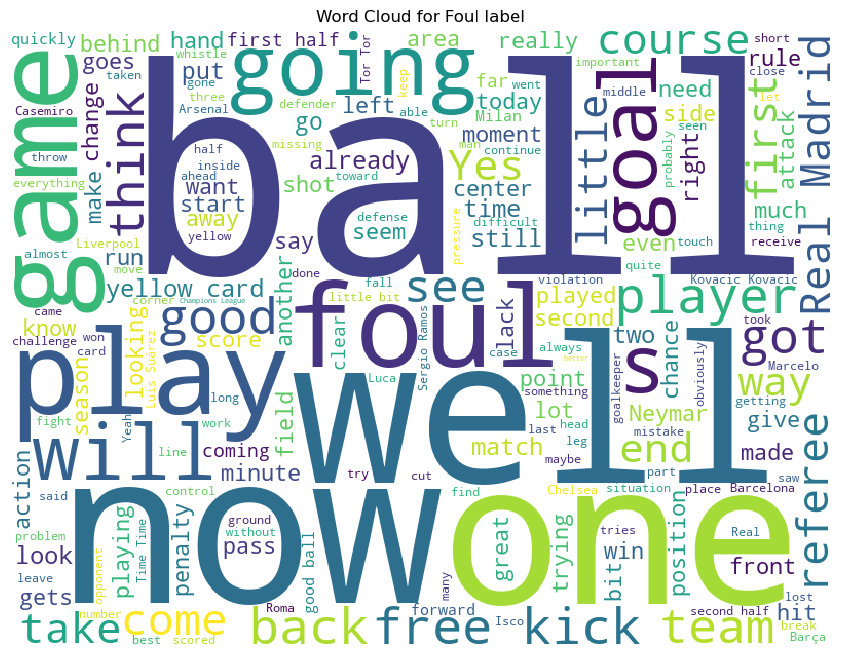

In [32]:
# Wordcloud for the class 'Foul'
class_wordcloud(data_15, 'Foul')

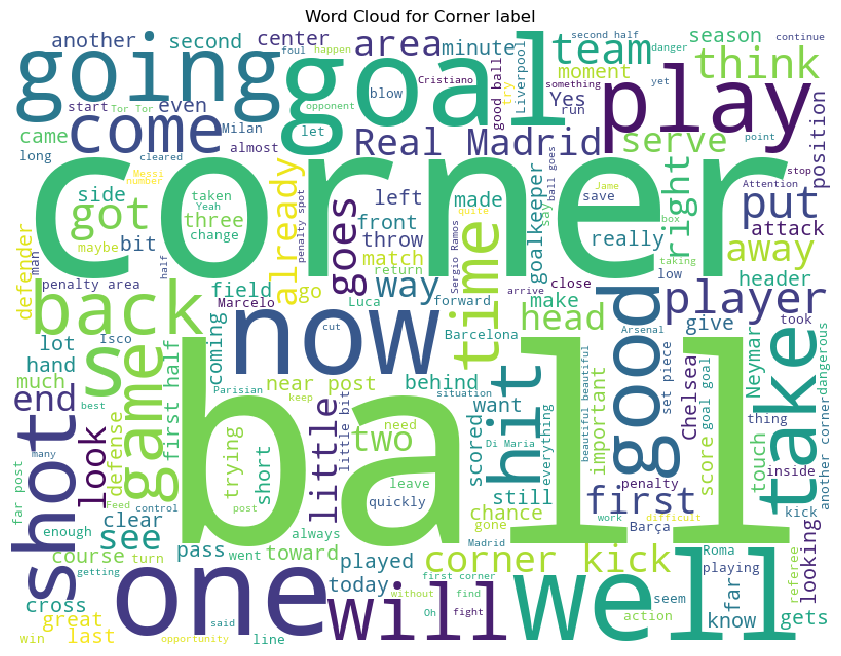

In [33]:
# Wordcloud for the class 'Corner'
class_wordcloud(data_15, 'Corner')

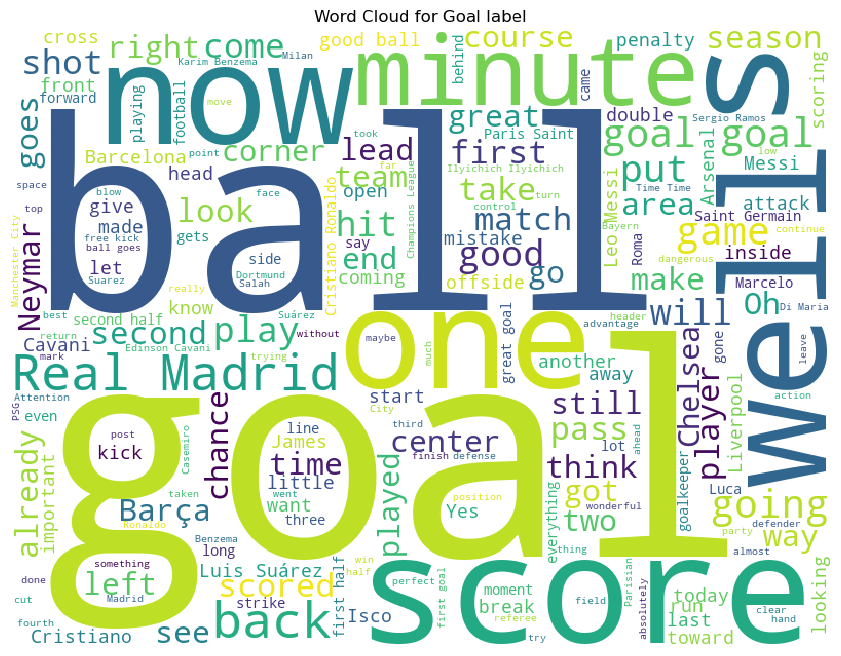

In [34]:
# Wordcloud for the class 'Goal'
class_wordcloud(data_15, 'Goal')

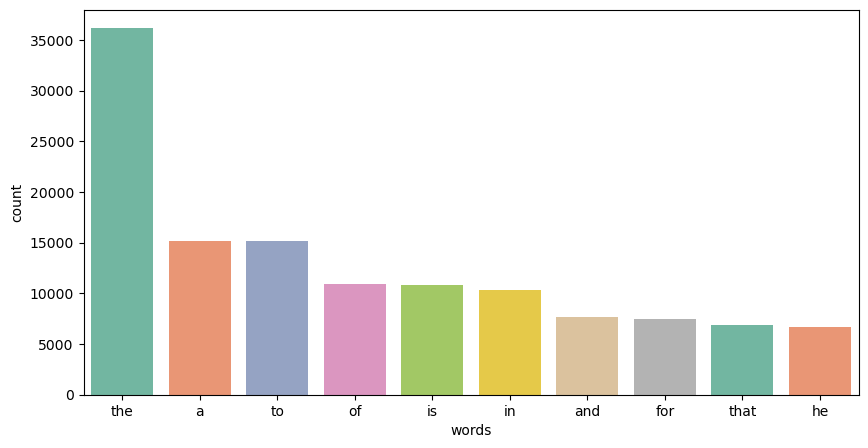

In [35]:
# Sns bar plot over the ASR_text for 'Foul'
sns_bar_plot(data_15, 'Foul')

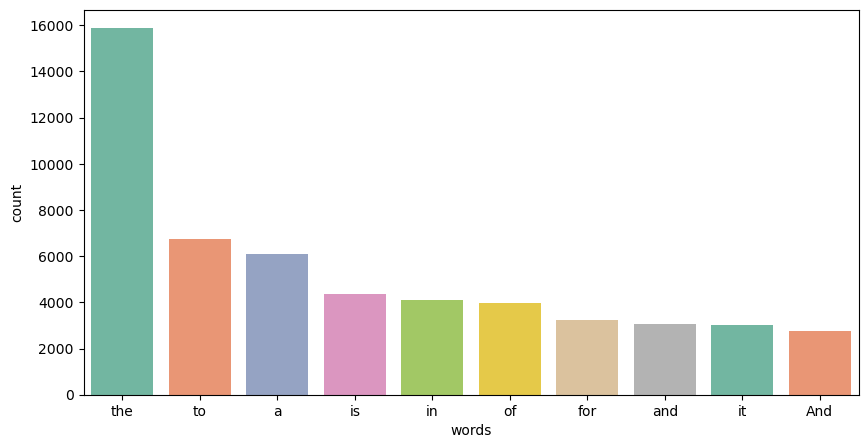

In [36]:
# Sns bar plot over the ASR_text for 'Corner'
sns_bar_plot(data_15, 'Corner')

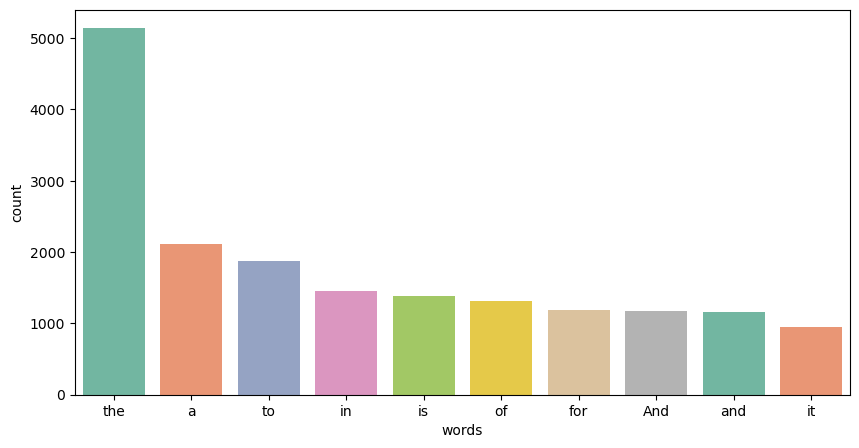

In [37]:
# Sns bar plot over the ASR_text for 'Goal'
sns_bar_plot(data_15, 'Goal')

#### Wordcloud for All leagues 30 second

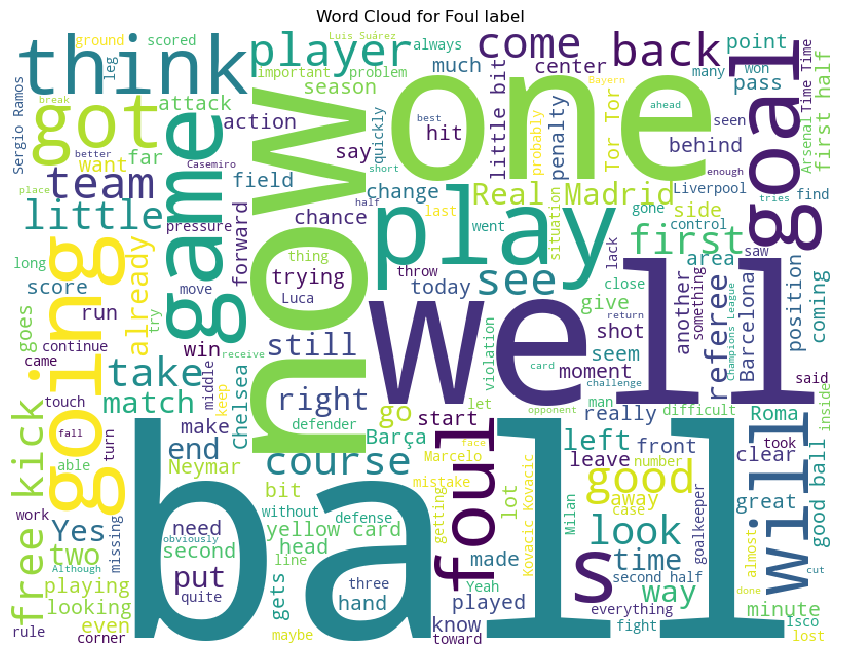

In [38]:
# Wordcloud for the class 'Foul'
class_wordcloud(data_30, 'Foul')

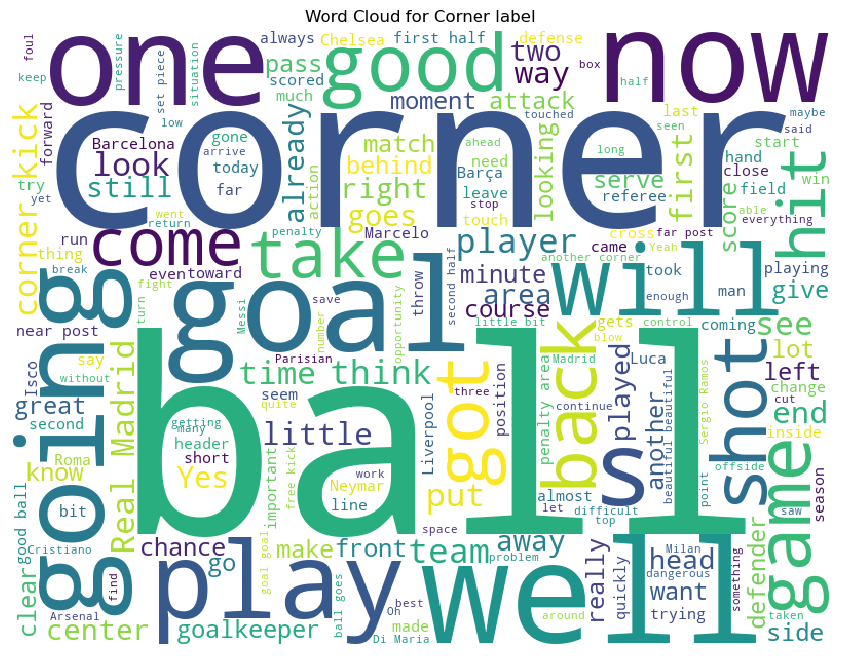

In [39]:
# Wordcloud for the class 'Corner'
class_wordcloud(data_30, 'Corner')

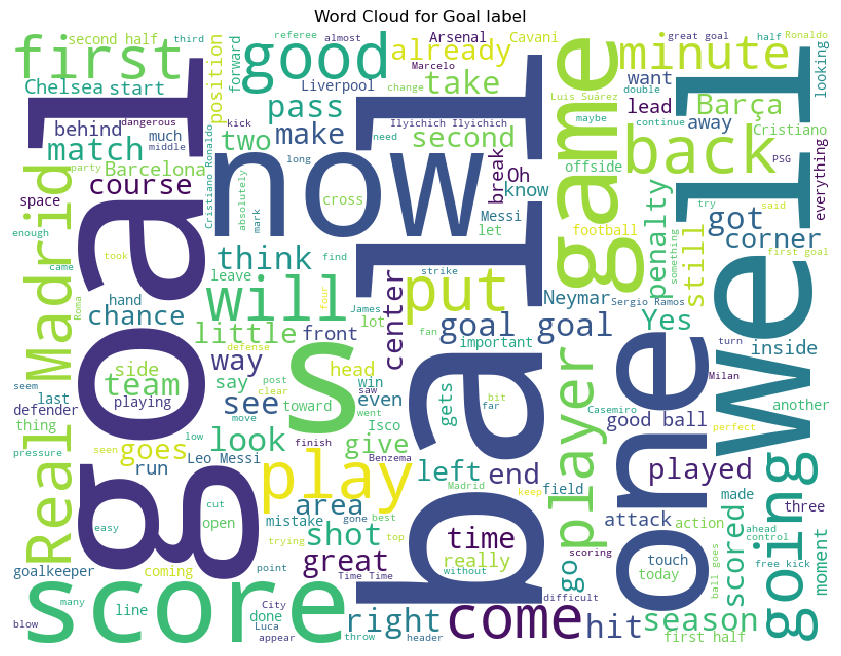

In [40]:
# Wordcloud for the class 'Goal'
class_wordcloud(data_30, 'Goal')

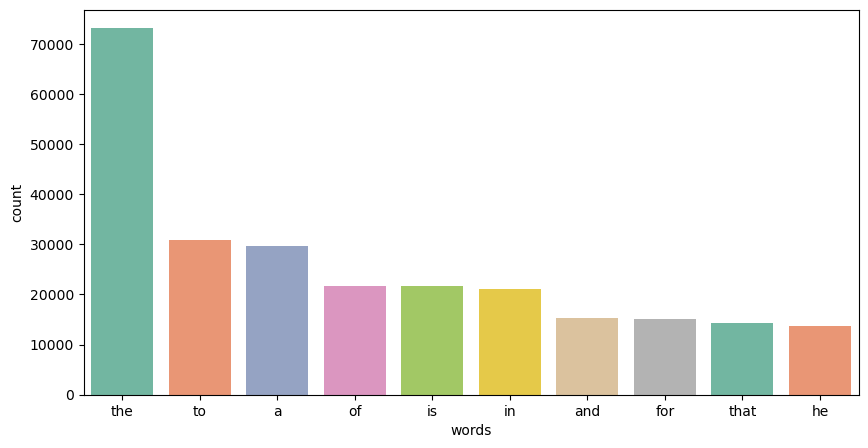

In [23]:
# Sns bar plot over the ASR_text for 'Foul'
sns_bar_plot(data_30, 'Foul')
plt.savefig('Foul_word_count_unfiltered_15')

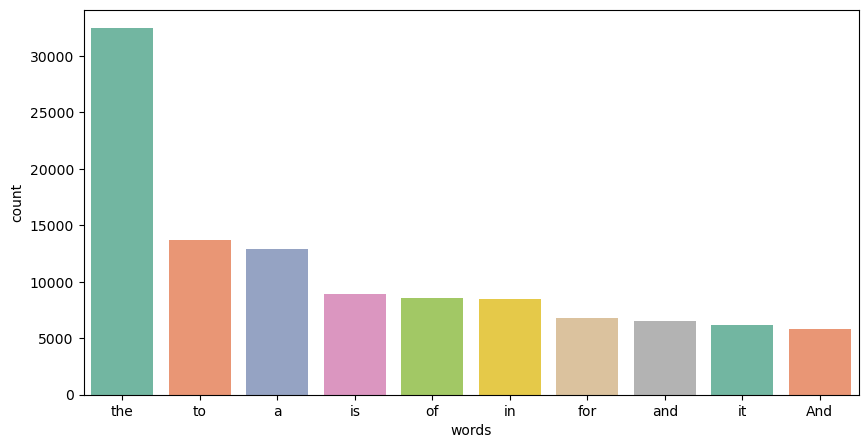

In [42]:
# Sns bar plot over the ASR_text for 'Corner'
sns_bar_plot(data_30, 'Corner')

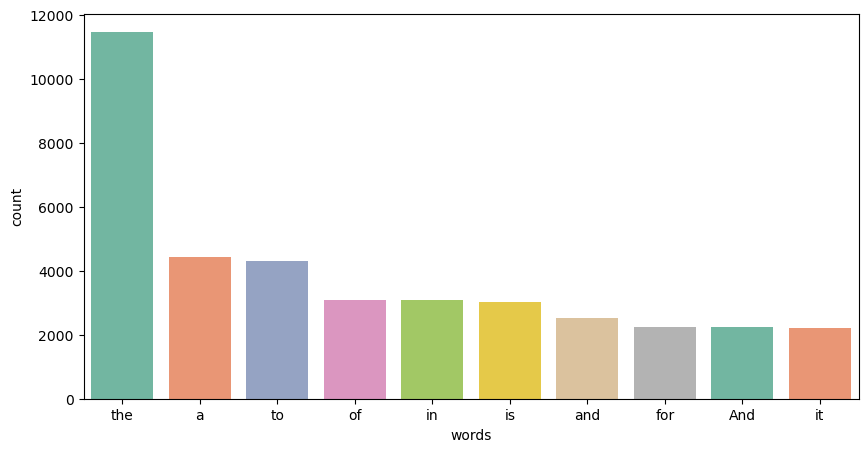

In [43]:
# Sns bar plot over the ASR_text for 'Goal'
sns_bar_plot(data_30, 'Goal')

In [44]:
# Removing stopwords 
# creating a new df for later comparison with original df

def remove_stopwords(data, text_column='ASR_text'):
    """
    Removes stopwords, punctuation, and converts text to lowercase from a specified column
    in a pandas DataFrame using the NLTK library.

    Parameters:
    - data: pandas.DataFrame, the DataFrame containing the text data.
    - text_column: str, the name of the column in the DataFrame containing the text.

    Returns:
    - A pandas DataFrame with the stopwords, punctuation removed, and text converted to lowercase
    from the specified text column.
    """
    df = data.copy()
    
    # Load the set of English stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation_and_numbers = set(string.punctuation+string.digits)
    
    # Add specific punctuations to remove
    additional_punctuations = {"'s", "’", "n't", "”", "...", "“", "'re", "de", "'ve"}
    all_punctuations = punctuation_and_numbers.union(additional_punctuations)
    
    # Function to remove stopwords and punctuation from a sentence
    def remove_stopwords_punctuation(sentence):
        # Tokenize and remove stopwords and punctuation
        word_tokens = word_tokenize(sentence.lower())  # Convert to lowercase before tokenizing
        filtered_sentence = [
            word for word in word_tokens if word not in stop_words and word not in all_punctuations
        ]
        return " ".join(filtered_sentence)
    
    # Apply the function to each row in the specified text column
    df[text_column] = df[text_column].apply(remove_stopwords_punctuation)
    
    return df

In [45]:
# new dataset with removed stopwords
df_filtered_15 = remove_stopwords(clean_data_15)
df_filtered_30 = remove_stopwords(clean_data_30)

#### Bar plot of most frequent words after preprocessing 

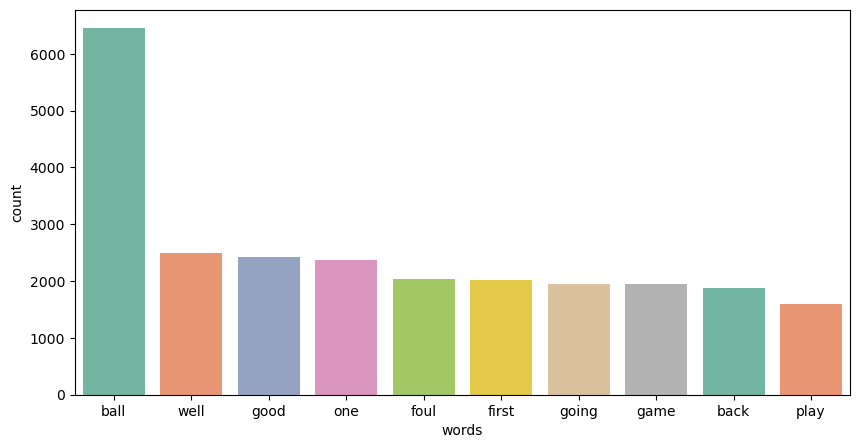

In [46]:
# Sns bar plot over the ASR_text for 'Foul' 15 seconds. 
sns_bar_plot(df_filtered_15, 'Foul')
plt.savefig('Foul_word_count_15')

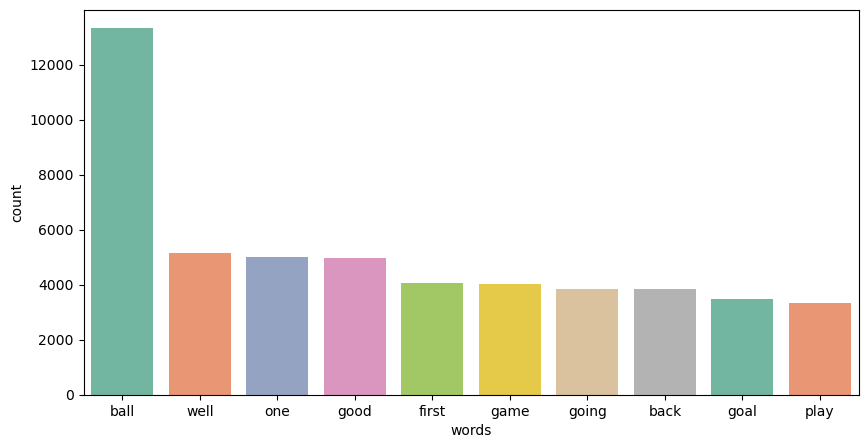

In [47]:
# Sns bar plot over the ASR_text for 'Foul' 30 seconds.
sns_bar_plot(df_filtered_30, 'Foul')
plt.savefig('Foul_word_count_30')

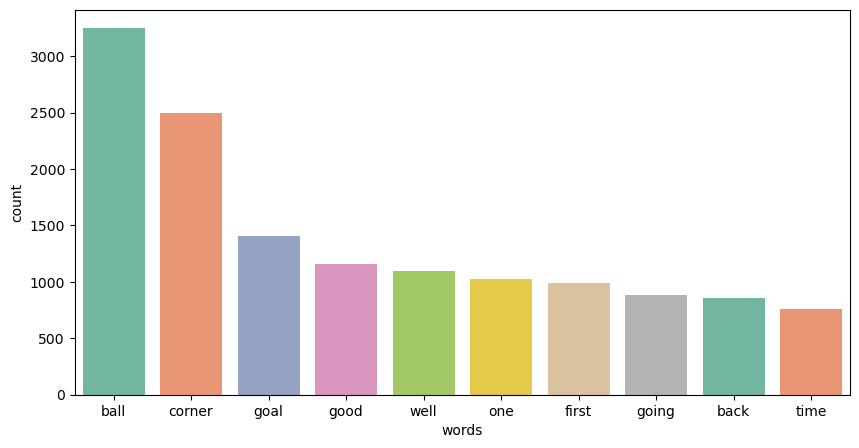

In [48]:
# Sns bar plot over the ASR_text for 'Corner' 15 seconds.
sns_bar_plot(df_filtered_15, 'Corner')
plt.savefig('Corner_word_count_15')

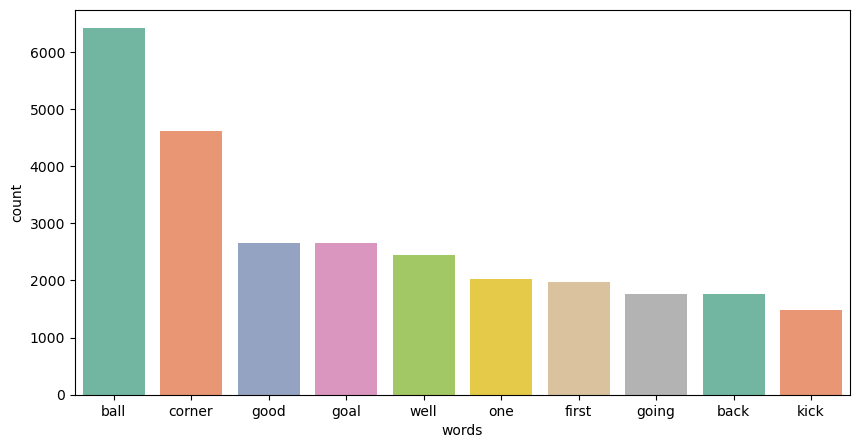

In [49]:
# Sns bar plot over the ASR_text for 'Corner' 30 seconds.
sns_bar_plot(df_filtered_30, 'Corner')
plt.savefig('Corner_word_count_30')

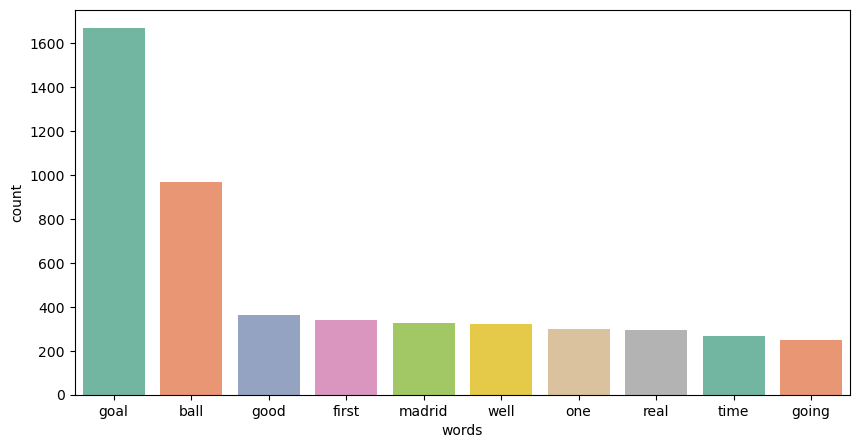

In [50]:
# Sns bar plot over the ASR_text for 'Goal'15 seconds.
sns_bar_plot(df_filtered_15, 'Goal')
plt.savefig('Goal_word_count_15')

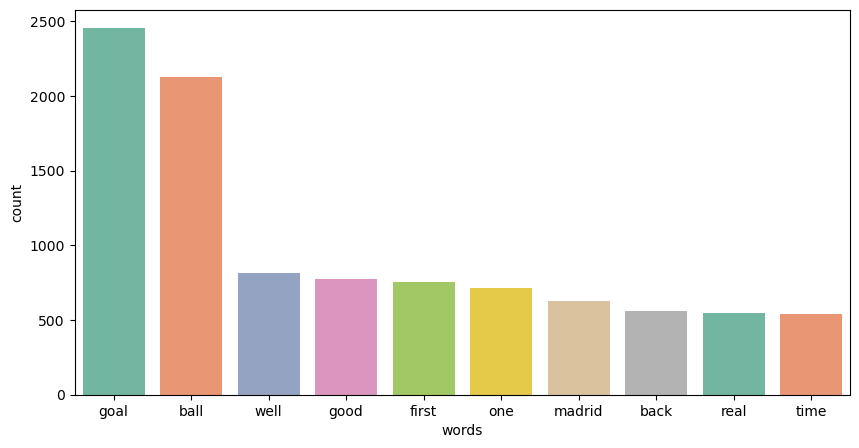

In [51]:
# Sns bar plot over the ASR_text for 'Goal' 30 seconds.
sns_bar_plot(df_filtered_30, 'Goal')
plt.savefig('Goal_word_count_30')

In [52]:

def histogram(data, x=200): #, save=None):

    df = data.copy()
    
    df['count'] = df['ASR_text'].apply(lambda x: len(x.split()))
    
    plt.figure(figsize= (8, 8))
    
    sns.displot(df['count'])
    
    plt.xlim(0, x)
    
    plt.xlabel('number of words ', fontsize = 12)
    
    #if save == 'yes':
       # plt.title("The Number of Words Distribution", fontsize = 14)
     #   plt.savefig('number_of_words_per_sample')
      #  plt.show()
    #else:
       # plt.title("The Number of Words Distribution", fontsize = 14)
    plt.show()

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 800x800 with 0 Axes>

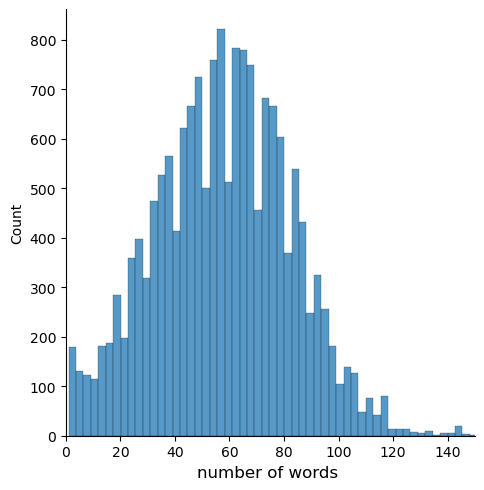

<Figure size 640x480 with 0 Axes>

In [53]:
# histogram over the words for the unfiltered dataset 
histogram(data_15, x=150)
plt.savefig('hist_raw_15')

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 800x800 with 0 Axes>

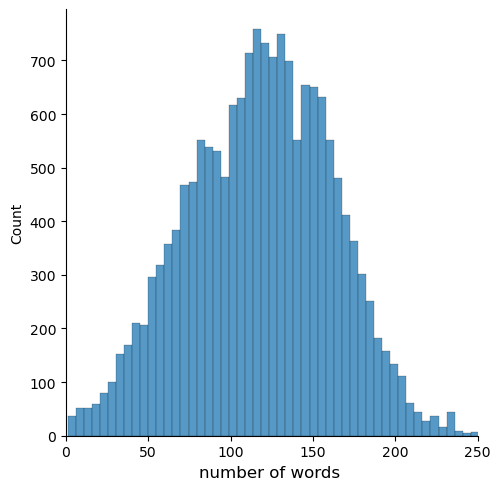

<Figure size 640x480 with 0 Axes>

In [54]:
# histogram over the words for the unfiltered dataset 
histogram(data_30, x= 250)
plt.savefig('hist_raw_30')

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 800x800 with 0 Axes>

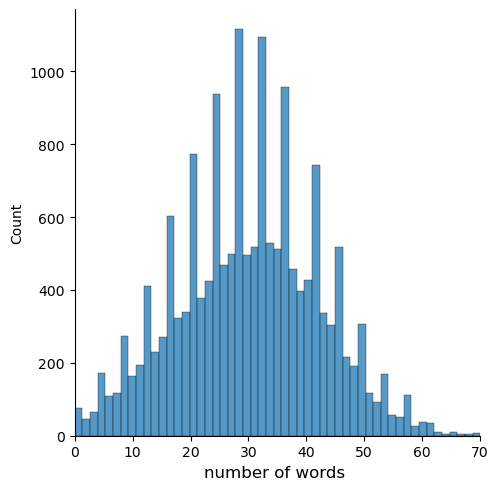

<Figure size 640x480 with 0 Axes>

In [55]:
# histogram over the words for the filtered dataset 
histogram(df_filtered_15, x=70)
plt.savefig('hist_pre_15')

/net/fs-2/scale/OrionStore/Scratch/joteklem/MyCondaEnvironments/Python3.11/orion_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 800x800 with 0 Axes>

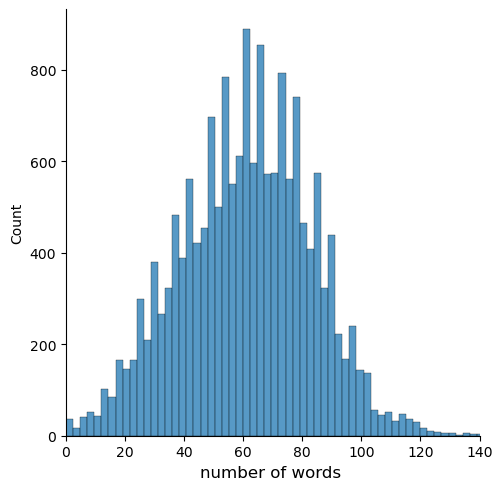

<Figure size 640x480 with 0 Axes>

In [56]:
# histogram over the words for the filtered dataset 
histogram(df_filtered_30, x=140)
plt.savefig('hist_pre_30')

In [57]:
# saving the dataframes after visualization and preprocessing 
df_filtered_15.to_csv('df_15.csv', index=False)
df_filtered_30.to_csv('df_30.csv', index=False)